**DMV Practical No-6 **                         
                           


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\CL-1\DM&V\retail_sales_dataset_corrected.csv")
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [4]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [5]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [6]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [7]:
df['Sales Amount'] = df['quantity'] * df['price']

In [8]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Sales Amount
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00


In [9]:
df["shopping_mall"].unique()

array(['Kanyon', 'Forum Istanbul', 'Metrocity', 'Metropol AVM',
       'Istinye Park', 'Mall of Istanbul', 'Emaar Square Mall',
       'Cevahir AVM', 'Viaport Outlet', 'Zorlu Center'], dtype=object)

In [10]:
sales_by_region = df.groupby('shopping_mall')['Sales Amount'].sum().reset_index()
sales_by_region = sales_by_region.sort_values(by='Sales Amount', ascending=False)
sales_by_region

,shopping_mall,Sales Amount
5,Mall of Istanbul,50872481.68
4,Kanyon,50554231.10
6,Metrocity,37302787.33
7,Metropol AVM,25379913.19
3,Istinye Park,24618827.68
9,Zorlu Center,12901053.82
0,Cevahir AVM,12645138.20
8,Viaport Outlet,12521339.72
1,Emaar Square Mall,12406100.29
2,Forum Istanbul,12303921.24


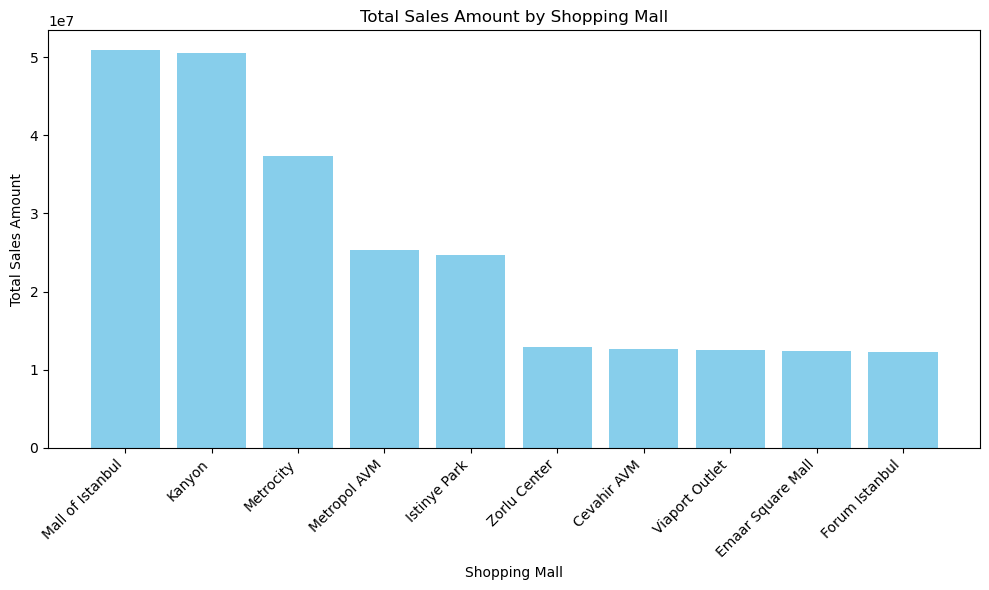

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(sales_by_region['shopping_mall'], sales_by_region['Sales Amount'], color='skyblue')
plt.title("Total Sales Amount by Shopping Mall")
plt.xlabel("Shopping Mall")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


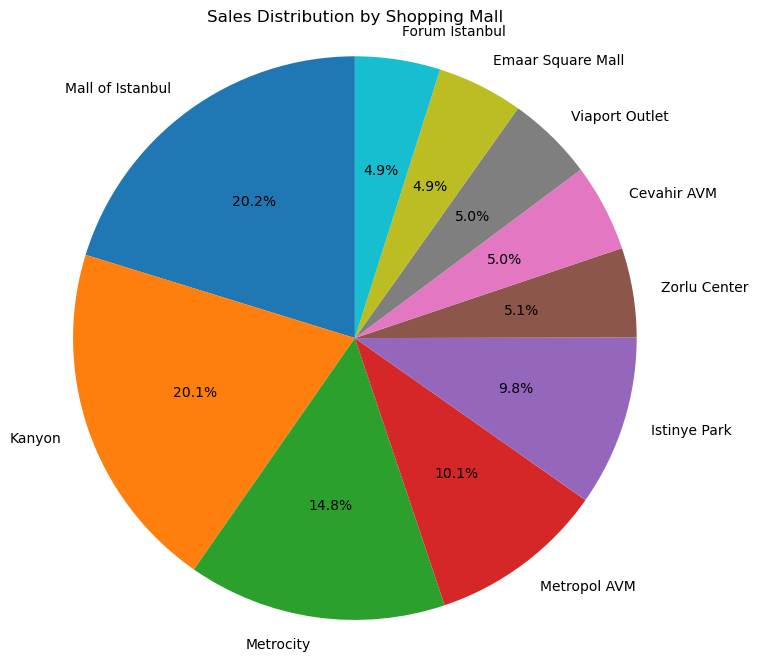

In [12]:
plt.figure(figsize=(8,8))
plt.pie(sales_by_region['Sales Amount'],
        labels=sales_by_region['shopping_mall'],
        autopct='%1.1f%%',
        startangle=90)
plt.title("Sales Distribution by Shopping Mall")
plt.axis("equal")
plt.show()


In [13]:
top_regions = sales_by_region.head()
print("Top Performing Regions")
top_regions

Top Performing Regions


,shopping_mall,Sales Amount
5,Mall of Istanbul,50872481.68
4,Kanyon,50554231.10
6,Metrocity,37302787.33
7,Metropol AVM,25379913.19
3,Istinye Park,24618827.68


In [14]:
region_category_sales = df.groupby(['shopping_mall', 'category'])['Sales Amount'].sum().unstack(fill_value=0)
region_category_sales


category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
shopping_mall,,,,,,,,
Cevahir AVM,44541.00,5706321.28,321214.00,44010.45,3243918.85,29723.82,3051300.0,204108.80
Emaar Square Mall,41995.80,5590490.40,338941.76,40610.95,3089675.16,30943.74,3094350.0,179092.48
Forum Istanbul,42056.40,5792444.24,353172.76,39162.24,3327942.65,32879.19,2516850.0,199413.76
Istinye Park,76083.30,11253900.24,655357.88,85918.44,6641481.22,68925.48,5436900.0,400261.12
Kanyon,163029.15,22609527.60,1369550.78,166497.05,13383190.83,127399.53,11944800.0,790236.16
Mall of Istanbul,172240.35,22947417.68,1367517.78,171177.90,13467814.80,127540.29,11828250.0,790522.88
Metrocity,125911.65,17226692.56,991860.04,129902.74,9519296.37,94227.09,8608950.0,605946.88
Metropol AVM,83718.90,11568084.00,680770.38,88638.04,7149825.21,67869.78,5327700.0,413306.88
Viaport Outlet,39632.40,5604594.16,347439.70,41662.18,3194704.91,27319.17,3066000.0,199987.20


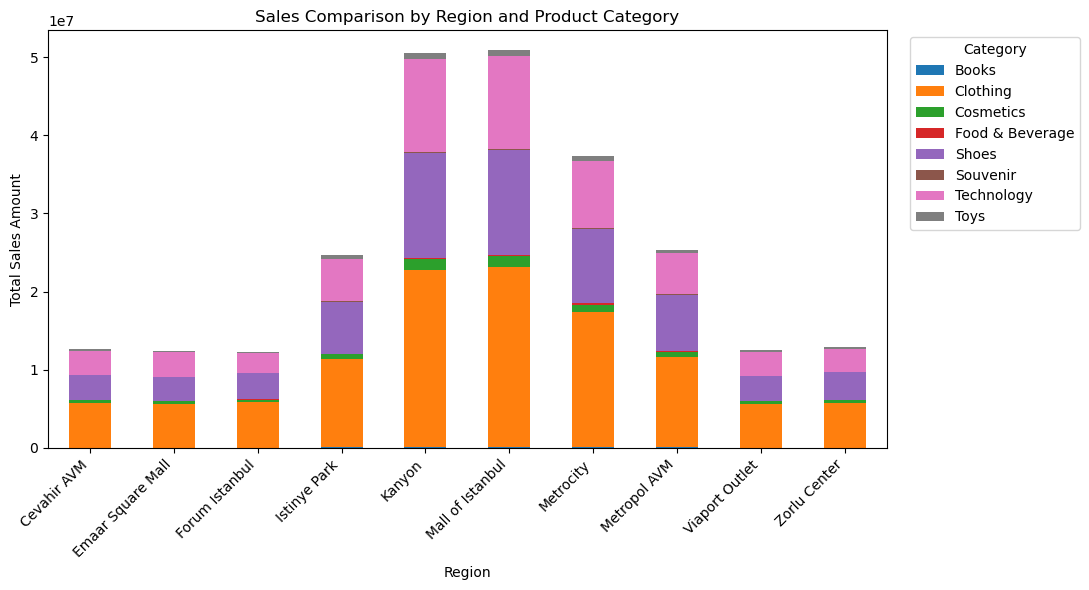

In [15]:
region_category_sales.plot(kind='bar', stacked=True, figsize=(11,6))
plt.title("Sales Comparison by Region and Product Category")
plt.xlabel("Region")
plt.ylabel("Total Sales Amount")
plt.legend(title='Category', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()